In [1]:
# pip install --upgrade tensorflow-probability

In [2]:
#  pip install tfp-nightly

In [3]:
pip install pyAstronomy

     |████████████████████████████████| 716kB 3.8MB/s 
  Created wheel for pyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504499 sha256=661945dc9fd4c8b574f3552b35d1807f252accfbdd9ea5c77410349b4135f609
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built pyAstronomy


In [4]:
pip install arviz


     |████████████████████████████████| 1.6MB 3.8MB/s 
     |████████████████████████████████| 4.7MB 20.6MB/s 
     |████████████████████████████████| 808kB 45.9MB/s 
     |████████████████████████████████| 317kB 20.5MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [5]:
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io
from PyAstronomy import pyasl
import time
r = pyasl.BallesterosBV_T()
b = pyasl.Ramirez2005()

uploaded = files.upload()

data0 = data = np.array(pd.read_csv(io.BytesIO(uploaded['SItable1.csv'])))

Saving SItable1.csv to SItable1.csv


In [6]:
import tensorflow.math as tf_m
def mean_fn(x, y, a, b, c, d):
  return (np.exp(x)*1000)**a * b*(y - c)**d #the m relation was through trial and error
#fn from Barnes 2007
def mean_fn_hmc(x):
  a = 0.5189
  b=0.75
  c=0.4
  d=0.601
  e = 2.718#np.float64(np.exp(1))
  BV = (5601/10**x[:,1])**3/2 - 0.3
  return (e**(x[:,0])*1000)**a * b*(BV - c)**d
  #return tf.convert_to_tensor(p, dtype=np.float64)#((e**x[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [7]:
# # mean_fn_hmc(observation_index_points)- p
# BV = (5601/10**observation_index_points[:,1])**3/2 #- 0.3
# ((2.718**observation_index_points[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [8]:
te = data0[:,2].tolist()
tee= data0[:,3].tolist()
age = data0[:,4].tolist()
agle = data0[:,5].tolist()
ague = data0[:,6].tolist()
mass = data0[:,7].tolist()
massle = data0[:,8].tolist()
massue = data0[:,9].tolist()
p = data0[:,21].tolist()
pl = data0[:,22].tolist()
pu = data0[:,23].tolist()

mass_error = (np.array(massle) + np.array(massue))/2
age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = ((np.array(pl)+np.array(pu))/2)#(np.log(p) - np.log(np.array(p)-np.array(pl)))


In [9]:
# indctr = data0[:,24]
# index = 0
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     index = index+1
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     p.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
indctr = data0[:,24]
index = 0
for i in range(0, len(p)-index):
  if mass[i]<1.2  or indctr[i]>1:
    index = index+1
for i in range(0, len(p)-index):
  if mass[i]<1.2  or indctr[i]>1:
    te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    p.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))   

mass_error = (np.array(massle) + np.array(massue))/2
age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

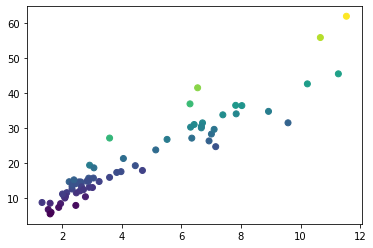

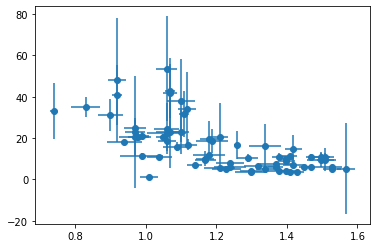

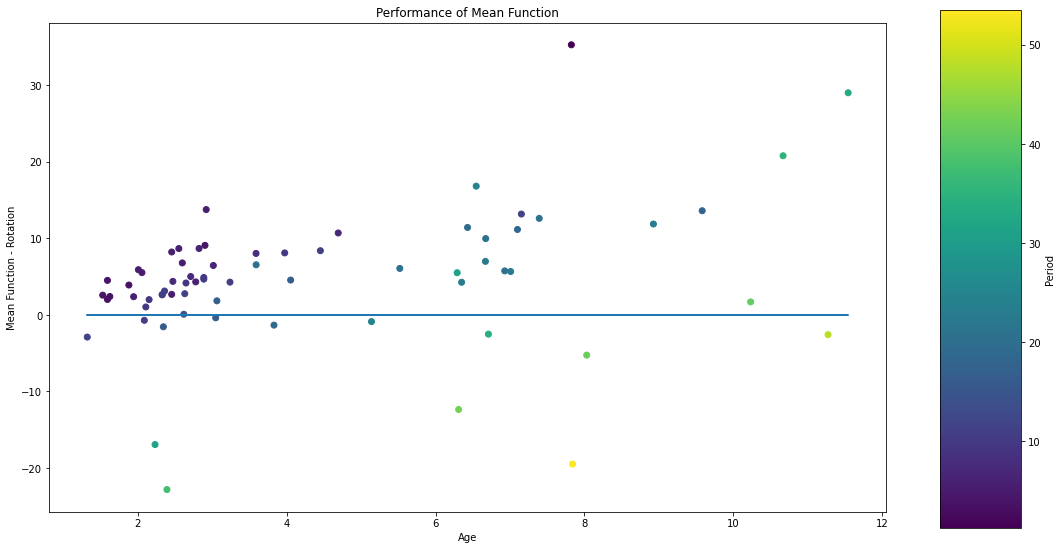

In [10]:
data = np.array([te, p, age, mass]).T
a = 0.5189
b=0.75
c=0.4
d=0.601
f = -0.6
X1 = np.log(data[:,2]) #age
X2 = r.t2bv(data[:,0])#data[::al,2] #B_V
X3 = data[:, 3] #mass
x = mean_fn(X1, X2, a, b, c, d)
plt.scatter(data[:,2], x, c=X2, cmap='viridis')
plt.show()
plt.errorbar(X3, p, xerr=mass_error, yerr=p_error, fmt='o')#, c=X2, cmap='hsv')
subtract = x-data[:,1]
plt.show()
fig = plt.figure(figsize=(15, 9))
plt.scatter(age, subtract, c=p, cmap='viridis')#data[:,2]
zero = np.zeros(len(x))
plt.plot(age, zero)
#plt.legend(fontsize='medium', loc=3)
plt.title('Performance of Mean Function')
plt.xlabel('Age')
plt.ylabel('Mean Function - Rotation')
#plt.subplots_adjust(bottom=np.min(X2), top=np.max(X2))
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='Period')


In [11]:
above = 0
below = 0
total = 0
for i in range(0, len(subtract)):
  if subtract[i]>=0 and p[i]>30:
    above = above + 1
  if subtract[i]<0 and p[i]>30:
    below = below + 1
  if p[i]>30:
    total = total+1

print('Above', 100*(above/total))
print('Below', 100*(below/total))

Above 36.36363636363637
Below 63.63636363636363


In [12]:
tf.enable_v2_behavior()
t1 = time.perf_counter()

tfb = tfp.bijectors
tfd = tfp.distributions
psd_kernels = tfp.math.psd_kernels

# observations from a known function at some random points.
X1 = np.log(age) #age
X2 = np.log10(te)#data[::al,2] #B_V
X3 = np.array(mass)
observation_index_points = np.dstack([X1, X2]).reshape(-1, 2)
observation_index_error =np.dstack([np.array(age_error/age), 0.43*np.array(tee)/np.array(te)]).reshape(-1, 2)
shape = np.array(observation_index_points.shape)
resolution = len(X2)
X1_test = np.log(np.linspace( np.min(data[::,2]), np.max(data[::,2]), num=resolution ))
X2_test = np.linspace( np.min(X2), np.max(X2), num=resolution )
X3_test = np.linspace( np.min(X3), np.max(X3), num=resolution )
X_test = np.dstack([X1_test, X2_test]).reshape(resolution,2)# resolution, resolution, 3)

a = 0.5189
b=0.75
c=0.4
d=0.601

Y = observations = (np.array(p) - mean_fn(X1, r.t2bv(np.array(te)), a, b, c, d))
noise_variance = p_error**0.5

sigma_init = 0.1*(max(Y) - min(Y))**0.5
l_scale = 4*(max(X2) - min(X2))
gaussian_process_model = tfd.JointDistributionSequential([
  tfd.LogNormal(sigma_init*np.ones(shape), np.float64(.00001)),
  tfd.LogNormal(l_scale*np.ones(shape), np.float64(.00001)),
  tfd.LogNormal(observation_index_points, observation_index_error),
  # tfd.Normal(X2.reshape(-1), 0.04*X1.reshape(-1)),
  # tfd.Normal(X3.reshape(-1), 0.04*X1.reshape(-1)),
  lambda amplitude, length_scale, observations1_: tfd.GaussianProcess(
      kernel=psd_kernels.ExponentiatedQuadratic(amplitude, length_scale),# mean_fn=mean_fn_hmc,
      index_points=observations1_, observation_noise_variance=observation_index_error)])

initial_chain_states = [
    sigma_init * tf.ones(shape, dtype=np.float64, name='init_amplitude'),
    l_scale * tf.ones(shape, dtype=np.float64, name='init_length_scale'),
    tf.convert_to_tensor(observation_index_points, dtype=np.float64, name='observations1_')]
    # tf.convert_to_tensor(X2.reshape(-1), dtype=np.float64, name='observations2_'),
    # tf.convert_to_tensor(X3.reshape(-1), dtype=np.float64, name='observations3_')]

initial_steps = [
    5e-6* tf.ones(shape, dtype=np.float64),
    5e-6* tf.ones(shape, dtype=np.float64),
    1e-6*tf.convert_to_tensor(observation_index_error, dtype=np.float64)]

unconstraining_bijectors = [
    tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus(),
    # tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus()]

def unnormalized_log_posterior(*args):
  return gaussian_process_model.log_prob(*args, x=observations)

num_results = 500
num_burnin_steps = 1000
@tf.function
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel=tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.HamiltonianMonteCarlo( 
#               target_log_prob_fn=unnormalized_log_posterior,
#               step_size=initial_steps,
#               num_leapfrog_steps=4), 
#               num_adaptation_steps=int(num_burnin_steps)),
#       trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

def run_mcmc():
  return tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      num_steps_between_results=3,
      current_state=initial_chain_states,
      kernel = tfp.mcmc.NoUTurnSampler( 
              target_log_prob_fn=unnormalized_log_posterior,
              step_size=initial_steps,
              unrolled_leapfrog_steps=4, parallel_iterations=2))
#   kernel=tfp.mcmc.SimpleStepSizeAdaptation(
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel = tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.NoUTurnSampler( 
#           target_log_prob_fn=unnormalized_log_posterior,
#           step_size=initial_steps,
#           unrolled_leapfrog_steps=4, parallel_iterations=1),
#           num_adaptation_steps=int(num_burnin_steps)),
#         trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

[
      amplitudes,
      length_scales,
      observations1_#, observations2_,observations3_
], is_accepted = run_mcmc()


#print("Acceptance rate: {}".format(np.mean(is_accepted)))
#observation_index_points = np.dstack([observations1_.numpy()[0], observations2_.numpy()[0], observations3_.numpy()[0]]).reshape(-1,3)
observation_index_points_1 = np.mean(observations1_,axis=0)#np.dstack([observations1_.numpy()[0], observations2_.numpy()[0], observations3_.numpy()[0]]).reshape(-1,3)
observations_l = np.array(p) - mean_fn(observation_index_points_1[:,0], r.t2bv(10**observation_index_points_1[:,1]), a, b, c, d)
#Y = observations = np.array(p) - mean_fn(observation_index_points[:,0], r.t2bv(10**(observation_index_points[:,1])), a, b, c, d)

gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X_test,
    observation_index_points=observation_index_points_1,
    observations= observations_l,
    observation_noise_variance=noise_variance, predictive_noise_variance = 0.9*noise_variance)

#print("Final NLL = {}".format(neg_log_likelihood_))

samples = gp.sample(10).numpy()
var = np.array(gp.variance())
# ==> 10 independently drawn, joint samples at `index_points`.
# ==> 10 independently drawn, noisy joint samples at `index_points`
t2 = time.perf_counter()
print()


Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/mcmc/sample.py:341: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


'\n, var_names=("amplitudes",\n      "length_scales",\n      "observation_noise_variances"))'

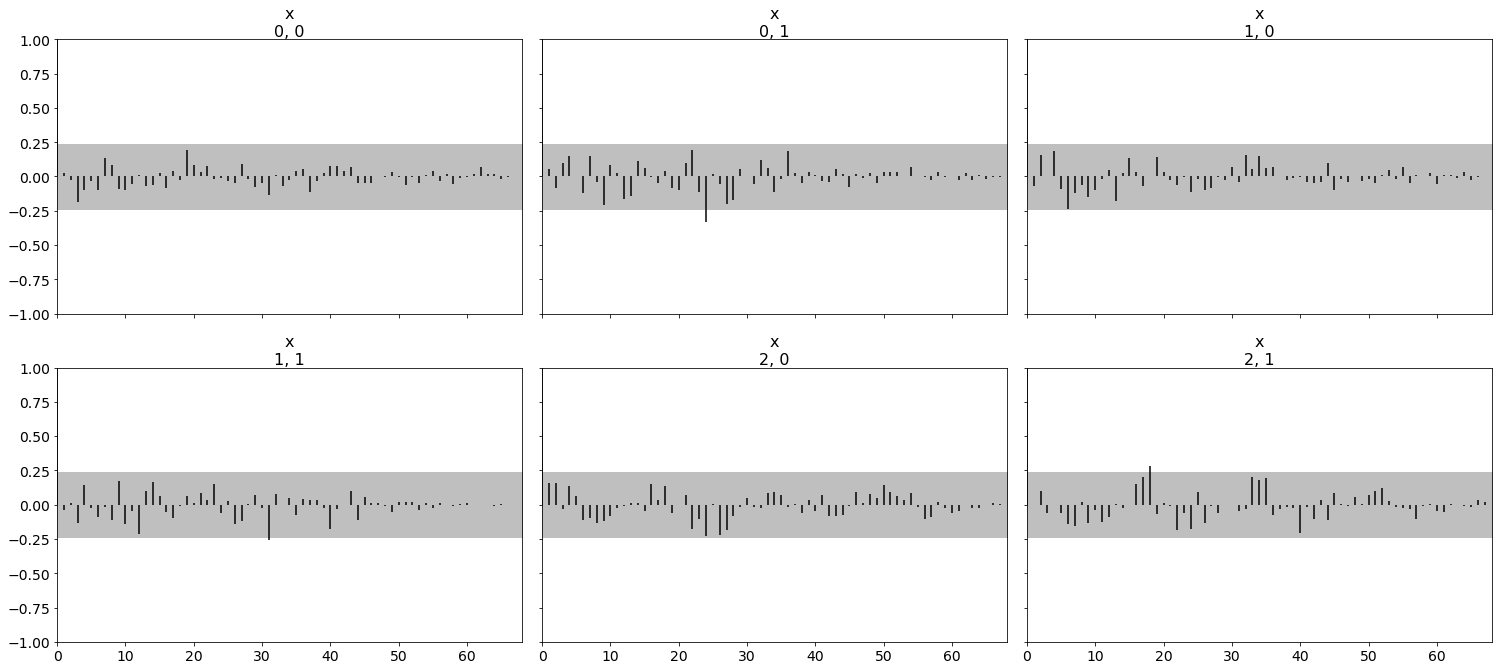

In [13]:
var1 = np.array([
      amplitudes[0],
      length_scales[0], observations1_[0]])
az.plot_autocorr(var1)
'''
, var_names=("amplitudes",
      "length_scales",
      "observation_noise_variances"))'''

In [14]:
# te = data0[:,2].tolist()
# tee= data0[:,3].tolist()
# age = data0[:,4].tolist()
# agle = data0[:,5].tolist()
# ague = data0[:,6].tolist()
# mass = data0[:,7].tolist()
# massle = data0[:,8].tolist()
# massue = data0[:,9].tolist()
# p = data0[:,21].tolist()
# pl = data0[:,22].tolist()
# pu = data0[:,23].tolist()
# p_0 = data0[:,21].tolist()
# mass_error = (np.array(massle) + np.array(massue))/2
# age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
# p_error = ((np.array(pl)+np.array(pu))/2)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

# indctr = data0[:,24]
# index = 4
# for i in range(0, len(p)-index):
#   if p[i]>5:# or indctr[i]>1:
#     index = index+1

# for i in range(0, len(p)):
#   if p_0[i]<30:# or indctr[i]>1:
#     te.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     tee.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     age.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     agle.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     ague.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     mass.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     massle.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     massue.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     pl.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     pu.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     p.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
# p = data0[:,21]
# te = data0[:,2][p>5].tolist()
# tee= data0[:,3][p>5].tolist()
# age = data0[:,4][p>5].tolist()
# agle = data0[:,5][p>5].tolist()
# ague = data0[:,6][p>5].tolist()
# mass = data0[:,7][p>5].tolist()
# massle = data0[:,8][p>5].tolist()
# massue = data0[:,9][p>5].tolist()
# pl = data0[:,22][p>5].tolist()
# pu = data0[:,23][p>5].tolist()
# p_0 = data0[:,21][p>5].tolist()
# p = data0[:,21][p>5].tolist()

# mass_error = (np.array(massle) + np.array(massue))/2
# age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
# p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

In [35]:
# tf.enable_v2_behavior()
# t1 = time.perf_counter()

# tfb = tfp.bijectors
# tfd = tfp.distributions
# psd_kernels = tfp.math.psd_kernels

# X1 = np.log(age) #age
# X2 = np.log10(te)#data[::al,2] #B_V
# X3 = np.array(mass)
# observation_index_points = np.dstack([X1, X2]).reshape(-1, 2)
# observation_index_error =np.dstack([np.array(age_error/age), 0.43*np.array(tee)/np.array(te)]).reshape(-1, 2)
# shape = np.array(observation_index_points.shape)
# resolution = len(X2)
# X1_test = np.log(np.linspace( np.min(data[::,2]), np.max(data[::,2]), num=resolution ))
# X2_test = np.linspace( np.min(X2), np.max(X2), num=resolution )
# X3_test = np.linspace( np.min(X3), np.max(X3), num=resolution )
# X_test = np.dstack([X1_test, X2_test]).reshape(resolution,2)# resolution, resolution, 3)

# a = 0.5189
# b=0.75
# c=0.4
# d=0.601

# Y = observations = (np.array(p) - mean_fn(X1, r.t2bv(np.array(te)), a, b, c, d))
# noise_variance = p_error**0.5
# length_scales_2 = max(observation_index_points[:,1]) - min(observation_index_points[:,1])

# amplitudes = 0.1*(max(Y) - min(Y))**0.5
# length_scales = max(observation_index_points[:,0]) - min(observation_index_points[:,0])


#kernel = psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes**0.5), np.mean(length_scales/2))*psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes**0.5), np.mean(length_scales_2*2))
gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X_test,
    observation_index_points=observation_index_points_1,
    observations= observations_l,
    observation_noise_variance=0.7*noise_variance, predictive_noise_variance = noise_variance*0.7)

# #print("Final NLL = {}".format(neg_log_likelihood_))

# samples = gp.sample(10).numpy()
# var = np.array(gp.variance())

In [36]:
numElems = len(Y)
sample = samples[0] + mean_fn(observation_index_points_1[:,0], r.t2bv(10**(observation_index_points_1[:,1])), a ,b ,c ,d)#np.array(observation_index_points[:,1])
idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems**2)) - 1, numElems)).astype(int)
# Picks equal spaced elements from (longer) prediction array so that its shape of data

mu_test = (np.array(sample).reshape(numElems**2)[idx])
sd_test = (np.array(var).reshape(numElems**2)[idx]) 

vals = np.sort([mu_test, sd_test], axis=1)
# numElems = len(Y)
# sample = samples[0] + mean_fn(observation_index_points[:,0], r.t2bv(10**(np.array(observation_index_points[:,1]))), a ,b ,c ,d)
# idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems)) - 1, numElems)).astype(int)
# # Picks equal spaced elements from (longer) prediction array so that its shape of data

# mu_test = (np.array(sample).reshape(numElems)[idx])
# sd_test = (np.array(var).reshape(numElems)[idx]) 

# vals = np.sort([mu_test, sd_test], axis=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

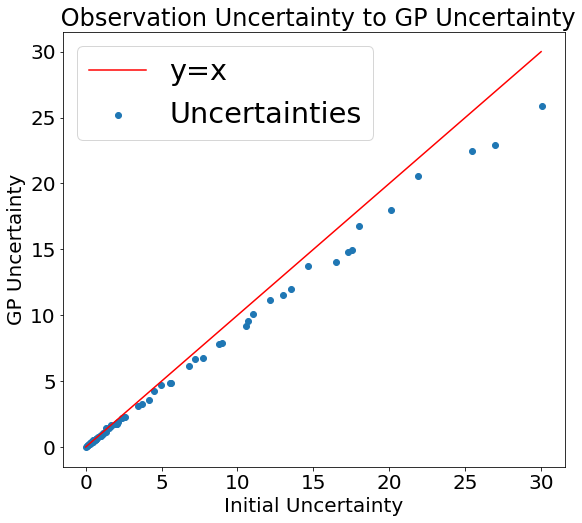

In [17]:
plt.figure(figsize=(9,8))
plt.rcParams['font.size'] = '20'
x = np.linspace(0, 30)
plt.plot(x, x , 'r', label = 'y=x')
plt.scatter(np.sort(p_error), vals[1]**2, label='Uncertainties')
plt.xlabel('Initial Uncertainty')
plt.ylabel('GP Uncertainty')
plt.title(' Observation Uncertainty to GP Uncertainty')
plt.legend(fontsize='x-large')
plt.savefig("error_mass.pdf")
files.download("error_mass.pdf") 

In [18]:
vals[1].shape

(68,)

Text(0, 0.5, 'Frequency')

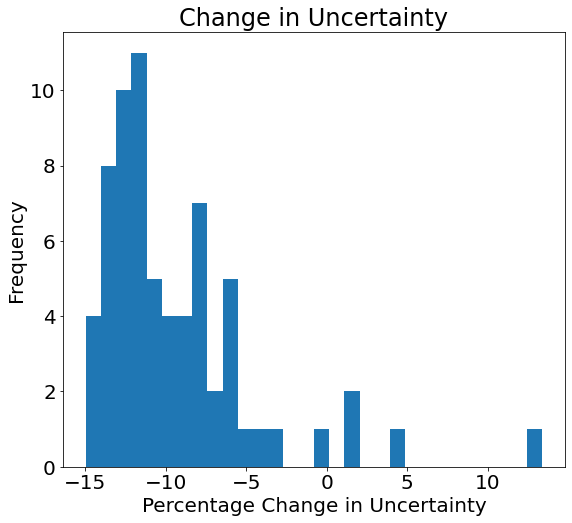

In [19]:
plt.figure(figsize=(9,8))
plt.title('Change in Uncertainty')
per_error = 100*(vals[1]**2 - np.sort(noise_variance**2))/np.sort(p_error)
plt.hist(per_error,  bins=30)
plt.xlabel('Percentage Change in Uncertainty')
plt.ylabel('Frequency')

In [20]:
sorted_p = np.sort(p)
perstd= 0
for i in range(0,len(p)):
  if abs((sorted_p[i] - vals[0, i]))<3*vals[1,i]:#1*(vals[1,i]**2+(0.9*noise_variance[i])**2)**0.5:
    perstd=perstd+1
print(perstd/len(p))

0.8676470588235294


In [21]:
ab8 = 0
for i in age:
  if i>8:
    ab8 = ab8 + 1

print(100*ab8/(len(age)+1))

10.144927536231885


In [22]:
100*(max(age)-8)/(max(age)-min(age))

34.650170314396455

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

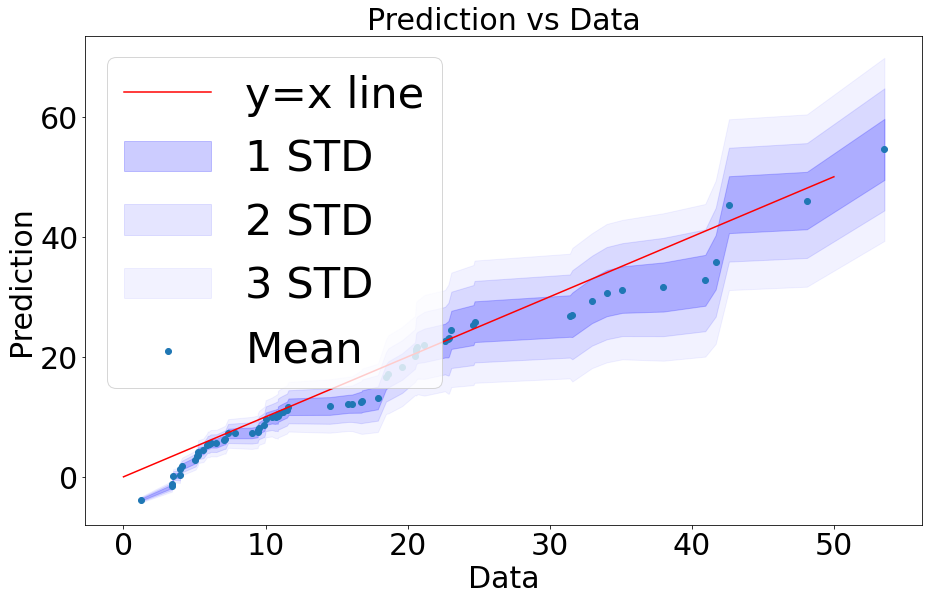

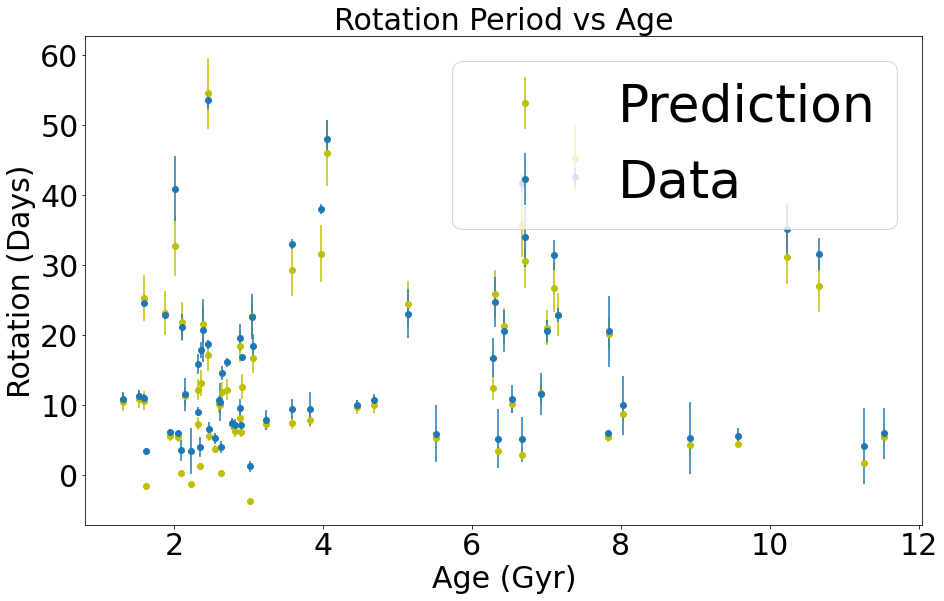

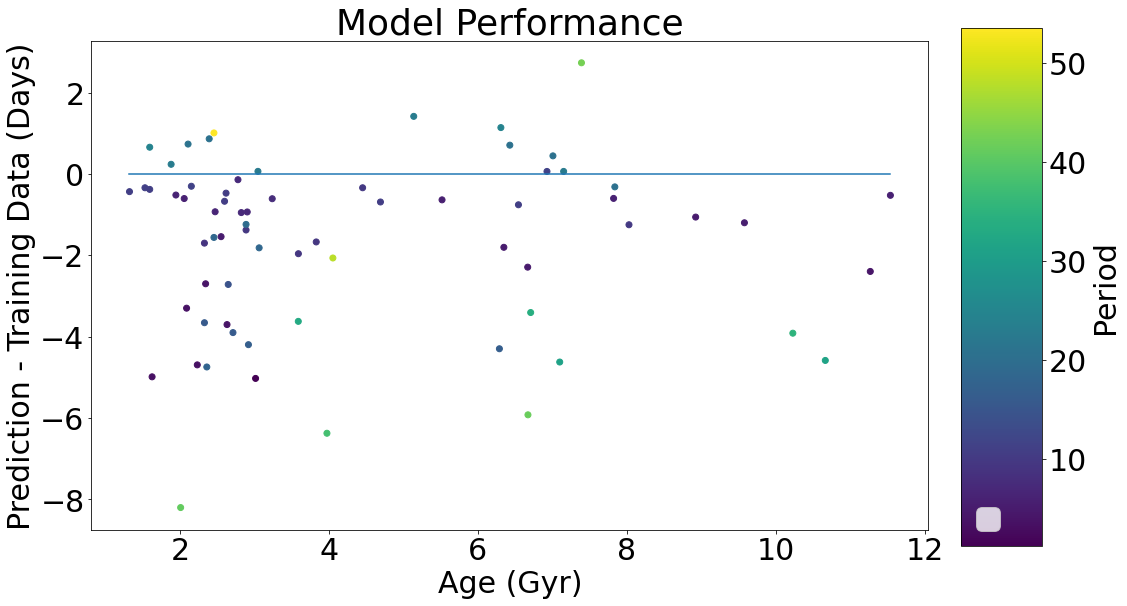

In [37]:
plt.figure(figsize=(15,9))
x = np.linspace(0, 50)
zline = np.linspace(min(np.exp(X1)), max(np.exp(X1)))
font = {'size': 30,
        }
plt.title('Prediction vs Data', fontdict=font)
#plt.errorbar(np.sort(data[::al, 1]), vals[0,:], yerr=vals[1,:]**0.5, fmt='bo')
plt.fill_between(np.sort(p), vals[0,:] - vals[1,:], vals[0,:] + vals[1,:], color='blue', alpha=0.2, label='1 STD')
plt.fill_between(np.sort(p), vals[0,:] - 2*vals[1,:], vals[0,:] + 2*vals[1,:], color='blue', alpha=0.1, label='2 STD')
plt.fill_between(np.sort(p), vals[0,:] - 3*vals[1,:], vals[0,:] + 3*vals[1,:], color='blue', alpha=0.05, label='3 STD')

#plt.errorbar(np.sort(p), np.sort(mu_test), yerr=vals[1,:], fmt='o')
plt.scatter(np.sort(p), np.sort(mu_test), label='Mean')
plt.plot(x, x , 'r', label='y=x line')
plt.xlabel('Data', fontdict=font)
plt.ylabel('Prediction', fontdict=font)
plt.legend(fontsize='x-large')
# plt.savefig("mass.pdf")
# files.download("mass.pdf") 

plt.figure(figsize=(15,9))
plt.title('Rotation Period vs Age', fontdict=font)
plt.errorbar(np.exp(X1), np.sort(vals[0]), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.errorbar(np.exp(X1), np.sort(p), yerr=noise_variance, fmt='o', label='Data')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Rotation (Days)', fontdict=font)
plt.legend(fontsize='xx-large')
# plt.savefig("scatter_1.pdf")
# files.download("scatter_1.pdf") 

plt.figure(figsize=(15,9))
plt.plot(zline, np.zeros(zline.shape))
#plt.errorbar(X2, np.sort(vals[0]) - np.sort(p), yerr=2*vals[1], fmt='o', c='y', label='2 standard deviations', alpha=0.4)
#plt.errorbar(X2, np.sort(vals[0]) - np.sort(p), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.scatter(np.exp(X1), np.sort(vals[0]) - np.sort(p), c=np.sort(p), cmap='viridis')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Prediction - Training Data (Days)', fontdict=font)
plt.title('Model Performance')
cax = plt.axes([0.93, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='Period')
plt.legend(fontsize='medium', loc=3)
# plt.savefig("residuals_mass.pdf")
# files.download("residuals_mass.pdf") 

In [24]:
above1 = 0
below1 = 0
total1 = 0
subtract1 = np.sort(vals[0]) - np.sort(p)
for i in range(0,len(subtract1)):
  if subtract1[i]>=0 :
    above1 = above1 + 1
  if subtract1[i]<0 :
    below1 = below1 + 1
  total1 = total1+1

print('Above', 100*(above1/total1))
print('Below', 100*(below1/total1))
print('Total', 100*(below1+above1)/total1)

Above 19.11764705882353
Below 80.88235294117648
Total 100.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

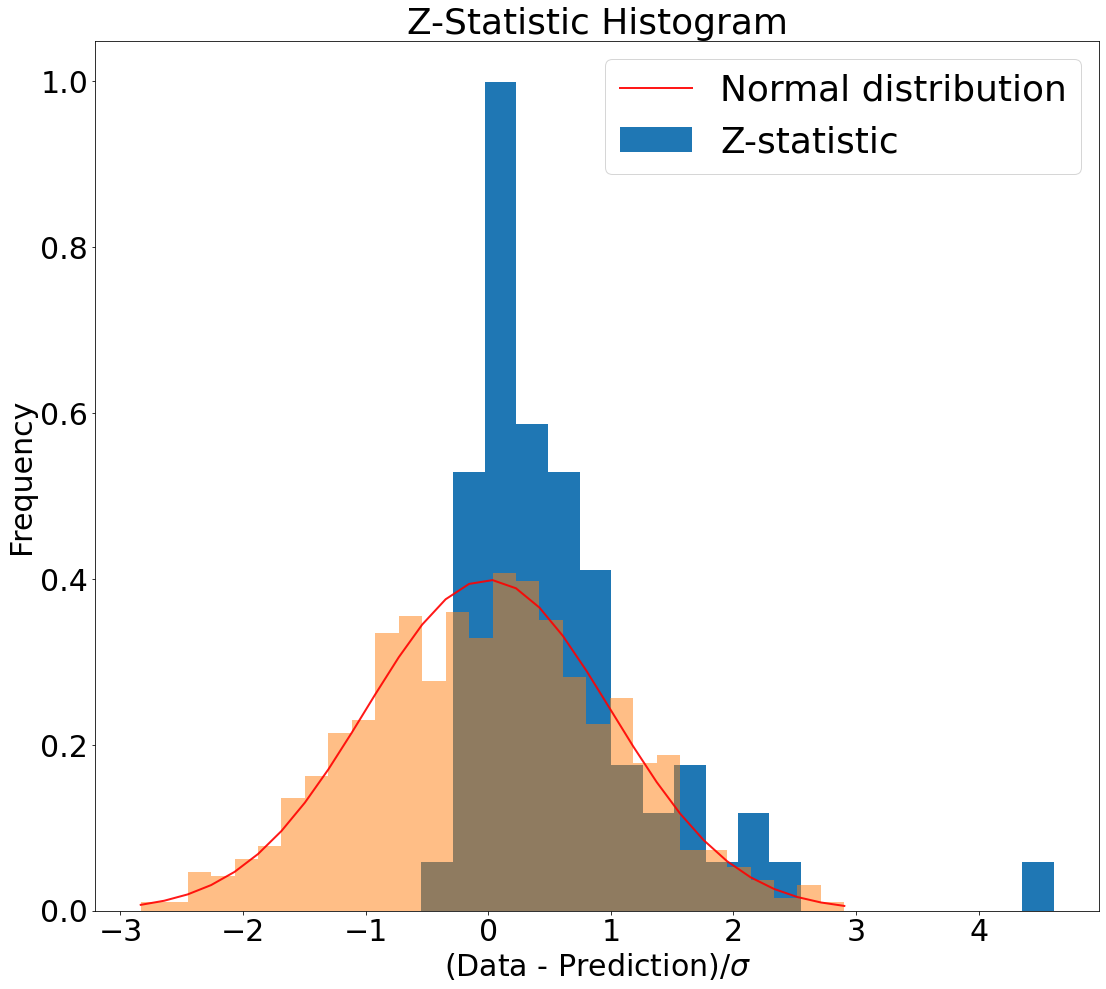

In [25]:
Z = (np.sort(p)-vals[0,:])/(vals[1,:]**2 +p_error**2)**0.5
Z = Z[Z<6]
plt.rcParams['font.size'] = '30'
plt.figure(figsize=(18,16))
plt.hist(Z, density=True, bins=20, label='Z-statistic')
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9, label='Normal distribution')
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')
plt.title('Z-Statistic Histogram')
plt.legend(fontsize='large')
plt.savefig("z_stat_mass.pdf")
files.download("z_stat_mass.pdf") 

(68,)


Text(0, 0.5, 'Frequency')

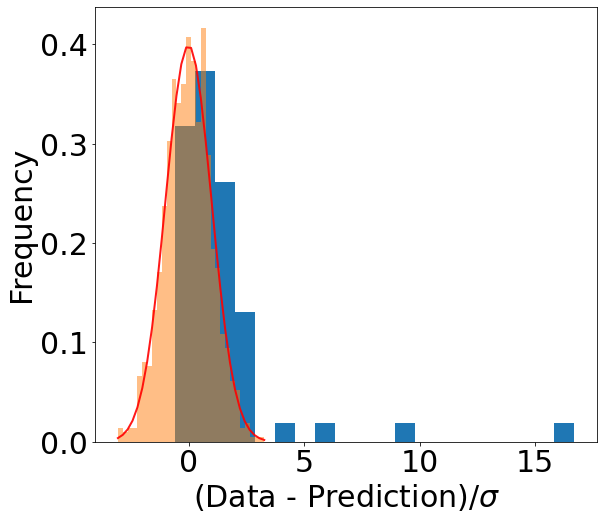

In [26]:
Z = (np.sort(p)-vals[0,:])/vals[1,:]
print(Y.shape)
x = Z.tolist()
for i in range(0,len(x)):
  if Z[i]>6:
    x.pop(i)
Z = np.array(x)
plt.figure(figsize=(9,8))
plt.hist(Z, density=True, bins=20)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9)
#plt.xlim((-5,5))
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')

In [27]:
max(Z)

16.69981305056595

In [28]:
import collections 
PooledModel = collections.namedtuple('PooledModel', ['Amplitude1','Length_Scale1', 'Obs'])
samplesN = [
      amplitudes[49],
      length_scales[49],
      observations1_[49]
]
pooled_samples = PooledModel._make(samplesN)

In [29]:
for var2, var_samples in pooled_samples._asdict().items():
  print('R-hat for ', var2, ':\t',
        tfp.mcmc.potential_scale_reduction(var_samples).numpy())

R-hat for  Amplitude1 :	 1.0221493068673178
R-hat for  Length_Scale1 :	 0.9936486107441516
R-hat for  Obs :	 27.961989768895307


In [30]:
import seaborn as sns
def plot_traces(var_name, samples, num_chains):
  if isinstance(samples, tf.Tensor):
    samples = samples.numpy() # convert to numpy array
  fig, axes = plt.subplots(1, 2, figsize=(14, 1.5), sharex='col', sharey='col')
  for chain in range(num_chains):
    axes[0].plot(samples[:, chain], alpha=0.7)
    axes[0].title.set_text("'{}' trace".format(var_name))
    sns.kdeplot(samples[:, chain], ax=axes[1], shade=False)
    axes[1].title.set_text("'{}' distribution".format(var_name))
    axes[0].set_xlabel('Iteration')
    axes[1].set_xlabel(var_name)
  plt.show()

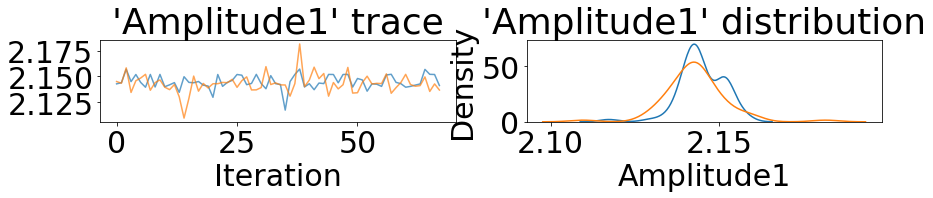

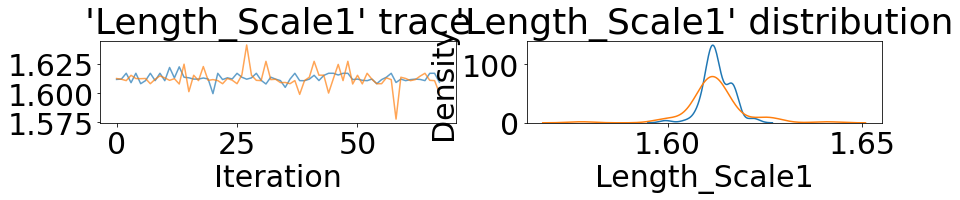

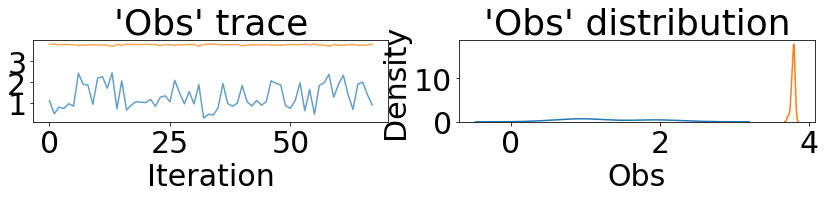

In [31]:
for var1, var_samples in pooled_samples._asdict().items():
  plot_traces(var1, samples=var_samples, num_chains=2)

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  2.,  2., 10., 30., 12.,  1.,  2.,
         0.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([-1.18731682e-05, -1.06166739e-05, -9.36017962e-06, -8.10368533e-06,
        -6.84719105e-06, -5.59069676e-06, -4.33420247e-06, -3.07770818e-06,
        -1.82121390e-06, -5.64719610e-07,  6.91774678e-07,  1.94826897e-06,
         3.20476325e-06,  4.46125754e-06,  5.71775183e-06,  6.97424611e-06,
         8.23074040e-06,  9.48723469e-06,  1.07437290e-05,  1.20002233e-05,
         1.32567176e-05]),
 <a list of 20 Patch objects>)

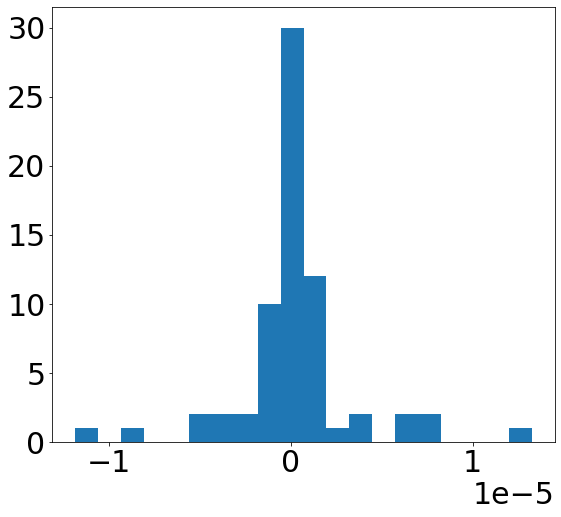

In [32]:
D = (observation_index_points_1[:,0]- observation_index_points[:,0])/observation_index_points[:,0]
plt.figure(figsize=(9,8))
plt.hist(D, bins=20)

(array([0.50129409, 2.00517638, 0.        , 2.00517638, 2.00517638,
        4.51164685, 3.50905866, 3.50905866, 1.00258819, 1.50388228,
        1.00258819, 0.50129409, 1.00258819, 0.        , 4.51164685,
        2.00517638, 1.50388228, 1.00258819, 0.50129409, 1.50388228]),
 array([-0.92621118, -0.89687535, -0.86753951, -0.83820367, -0.80886783,
        -0.77953199, -0.75019616, -0.72086032, -0.69152448, -0.66218864,
        -0.6328528 , -0.60351697, -0.57418113, -0.54484529, -0.51550945,
        -0.48617361, -0.45683778, -0.42750194, -0.3981661 , -0.36883026,
        -0.33949442]),
 <a list of 20 Patch objects>)

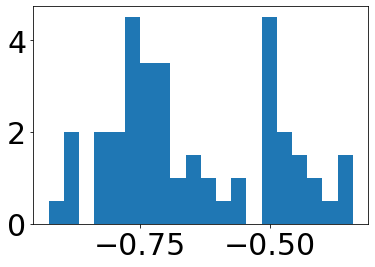

In [33]:
D_2 = (observation_index_points_1[:,0] - observation_index_points[:,1])/observation_index_points[:,1]
plt.hist(D_2, density=True, bins=20)